# Julia Primer: A Quick Review for Computational Economics

This note provides a brief review of essential programming concepts (in Julia) commonly used in solving macroeconomic models. The review is structured around simple exercises and covers:

- Loop (for and while)
- Defining functions
- If statement
- Using external packages (e.g., Plot.jl)

### For loop

Consider computing the following geometric series:

$$
\sum_{t=0}^\infty \delta^t,
$$
where $\delta\in(0,1)$.

In [16]:
# for loop
δ=0.5
T = 100000
y = 0
for t in 1:T
    y+=δ^(t-1)
end
analytical = 1.0/(1.0-δ)
@show y;
@show analytical;


y = 2.0
analytical = 2.0


### Function and if statement
Now write down a function that returns the result of $\sum_{t=0}^\infty \delta^t$ taking $\delta\in(0,1)$ as input.

In [23]:
# function & if statement
function g(δ)

    if (δ≤0.0 && δ≥1.0)
        error("δ should be in (0,1)")
    end

    T = 100000
    y = 0
    for t in 1:T
        y+=δ^(t-1)
    end
    analytical = 1.0/(1.0-δ)
    return y,analytical
end

y,analytical = g(0.2)

@show y;
@show analytical;

y = 1.25
analytical = 1.25


### While loop and plot

Draw from the normal distribution $N(\mu,\sigma)$, where $\mu=0$ and $\sigma=0.01$. Compute the sample mean and continue drawing until the sample mean is sufficiently close to $\mu$. Plot the sample mean on the y-axis against the number of iterations on the x-axis.

In [60]:
# while loop
using Distributions

μ=0.0
σ=0.01

dif=1.0
tol=σ/1000
iter=1
maxiter=10000

sample_mean = 0.0
total = 0.0

sample_mean_vec = zeros(maxiter)

while (dif>tol)
    draw = rand(Normal(μ,σ))

    total += draw
    sample_mean = total/iter
    sample_mean_vec[iter]=sample_mean

    dif = abs(sample_mean-μ)

    if (iter<maxiter)
        iter+=1
    else
        println("iter=maxiter")
        break
    end
end

In [61]:
@show iter;
@show μ;
@show sample_mean;

iter = 109
μ = 0.0
sample_mean = 1.5003808437195108e-6


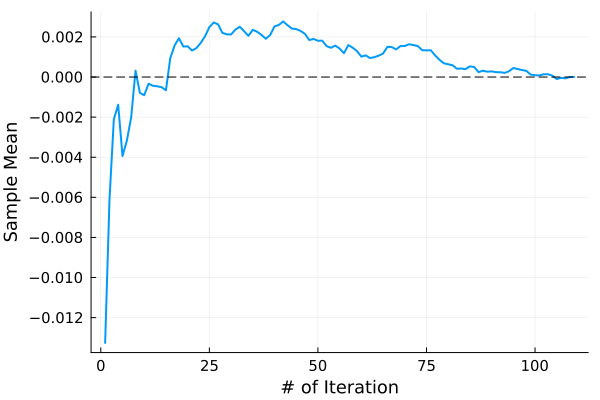

In [62]:
# plot
using Plots
start_iter = 1
plot(start_iter:iter, sample_mean_vec[start_iter:iter],
     label="",                 
     xlabel="# of Iteration",                   
     ylabel="Sample Mean",                
     linewidth=2,
     guidefont=font(12),
     tickfont=font(10),
     legendfont=font(10))
hline!([μ], color=:black, linestyle=:dash, label="")

### Discretization and built-in functions

Plot $y=\log(x)$ and $y=\exp(x)$ on $(0,1]$.

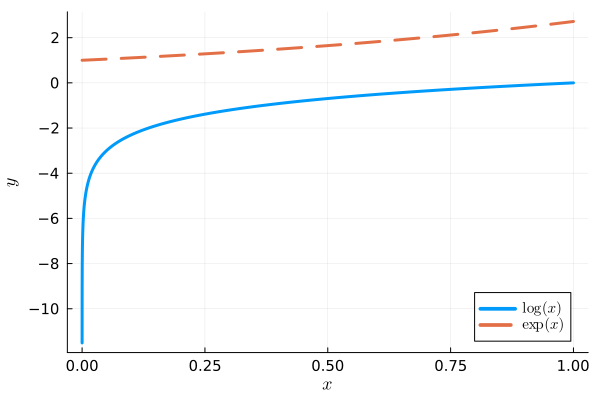

In [54]:
# discretization & built-in function

xmin = 1.e-5
xmax = 1.0
xn   = 10000

x = collect(LinRange(xmin,xmax,xn))

y_log = zeros(xn)
y_exp = zeros(xn)
for xc in eachindex(x)
     y_log[xc] = log(x[xc])
     y_exp[xc] = exp(x[xc])
end
# or you may simply do it like:
# y_log = log.(x)
# y_exp = exp.(x)

using LaTeXStrings
plot(x, y_log;
     label=L"\log(x)",                 
     xlabel=L"x",                   
     ylabel=L"y",                
     linewidth=3,
     guidefont=font(12),
     tickfont=font(10),
     legendfont=font(10))
plot!(x, y_exp;
      label=L"\exp(x)",
      ls=:dash,
      linewidth=3)